# Introduction to Exploratory Data Analysis
##### This note book involves the EDA for menstrual cycle prediction which includes; data quality checks, trend visualization, pattern identification, and outlier handling to inform accurate predictions.

## Step 1: Library import and Reading data

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')


In [9]:
#read data
df = pd.read_csv("Menstural_Cycle_Data.csv")

## Step 2: Data Understanding

In [10]:
#Dataframe shape
df.shape

(1665, 80)

In [11]:
#data head(20 rows). To preview all rows, set pd.set_option('display.max_rows', None)
df.head(20)

,ClientID,CycleNumber,Group,CycleWithPeakorNot,ReproductiveCategory,LengthofCycle,MeanCycleLength,EstimatedDayofOvulation,LengthofLutealPhase,FirstDayofHigh,...,Method,Prevmethod,Methoddate,Whychart,Nextpreg,NextpregM,Spousesame,SpousesameM,Timeattemptpreg,BMI
0,nfp8122,1,0,1,0,29,27.33,17,12,12,...,9,,,2,7,7,1,1,0,21.254724111867
1,nfp8122,2,0,1,0,27,,15,12,13,...,,,,,,,,,,
2,nfp8122,3,0,1,0,29,,15,14,,...,,,,,,,,,,
3,nfp8122,4,0,1,0,27,,15,12,13,...,,,,,,,,,,
4,nfp8122,5,0,1,0,28,,16,12,12,...,,,,,,,,,,
5,nfp8122,6,0,1,0,26,,15,11,10,...,,,,,,,,,,
6,nfp8122,7,0,1,0,29,,16,13,,...,,,,,,,,,,
7,nfp8122,8,0,1,2,24,,14,10,9,...,,,,,,,,,,
8,nfp8122,9,0,1,0,28,,16,12,9,...,,,,,,,,,,
9,nfp8122,10,0,1,0,28,,17,11,13,...,,,,,,,,,,


In [12]:
#all columns
df.columns

Index(['ClientID', 'CycleNumber', 'Group', 'CycleWithPeakorNot',
       'ReproductiveCategory', 'LengthofCycle', 'MeanCycleLength',
       'EstimatedDayofOvulation', 'LengthofLutealPhase', 'FirstDayofHigh',
       'TotalNumberofHighDays', 'TotalHighPostPeak', 'TotalNumberofPeakDays',
       'TotalDaysofFertility', 'TotalFertilityFormula', 'LengthofMenses',
       'MeanMensesLength', 'MensesScoreDayOne', 'MensesScoreDayTwo',
       'MensesScoreDayThree', 'MensesScoreDayFour', 'MensesScoreDayFive',
       'MensesScoreDaySix', 'MensesScoreDaySeven', 'MensesScoreDayEight',
       'MensesScoreDayNine', 'MensesScoreDayTen', 'MensesScoreDay11',
       'MensesScoreDay12', 'MensesScoreDay13', 'MensesScoreDay14',
       'MensesScoreDay15', 'TotalMensesScore', 'MeanBleedingIntensity',
       'NumberofDaysofIntercourse', 'IntercourseInFertileWindow',
       'UnusualBleeding', 'PhasesBleeding', 'IntercourseDuringUnusBleed',
       'Age', 'AgeM', 'Maristatus', 'MaristatusM', 'Yearsmarried', 'Wedding

In [13]:
#Get basic information about the dataset & column types
pd.set_option('display.max_columns', None)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1665 entries, 0 to 1664
Data columns (total 80 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ClientID                    1665 non-null   object
 1   CycleNumber                 1665 non-null   int64 
 2   Group                       1665 non-null   int64 
 3   CycleWithPeakorNot          1665 non-null   int64 
 4   ReproductiveCategory        1665 non-null   int64 
 5   LengthofCycle               1665 non-null   int64 
 6   MeanCycleLength             1665 non-null   object
 7   EstimatedDayofOvulation     1665 non-null   object
 8   LengthofLutealPhase         1665 non-null   object
 9   FirstDayofHigh              1665 non-null   object
 10  TotalNumberofHighDays       1665 non-null   object
 11  TotalHighPostPeak           1665 non-null   object
 12  TotalNumberofPeakDays       1665 non-null   object
 13  TotalDaysofFertility        1665 non-null   obje

In [14]:
# Summary statistics
print(df.describe())

       CycleNumber        Group  CycleWithPeakorNot  ReproductiveCategory  \
count  1665.000000  1665.000000         1665.000000           1665.000000   
mean      8.040841     0.382583            0.912312              0.055255   
std       6.593686     0.486164            0.282925              0.479706   
min       1.000000     0.000000            0.000000              0.000000   
25%       3.000000     0.000000            1.000000              0.000000   
50%       7.000000     0.000000            1.000000              0.000000   
75%      11.000000     1.000000            1.000000              0.000000   
max      45.000000     1.000000            1.000000              9.000000   

       LengthofCycle  
count    1665.000000  
mean       29.299099  
std         3.887932  
min        18.000000  
25%        27.000000  
50%        29.000000  
75%        31.000000  
max        54.000000  


## Step 3: Data Preparation

### Dropping irrelevant columns and rows

In [15]:
# 9 columns is selected and the rest dropped
df =  df[['ClientID', 'CycleNumber', 
       #'Group', 
       'CycleWithPeakorNot',
       # 'ReproductiveCategory', 
       'LengthofCycle', 
       #'MeanCycleLength',
       'EstimatedDayofOvulation', 'LengthofLutealPhase', 
       #'FirstDayofHigh',
       'TotalNumberofHighDays', 
       #'TotalHighPostPeak', 'TotalNumberofPeakDays',
       'TotalDaysofFertility', 
       #'TotalFertilityFormula', 
       'LengthofMenses',
       #  'MeanMensesLength', 'MensesScoreDayOne', 'MensesScoreDayTwo',
       #'MensesScoreDayThree', 'MensesScoreDayFour', 'MensesScoreDayFive',
       #'MensesScoreDaySix', 'MensesScoreDaySeven', 'MensesScoreDayEight',
       #'MensesScoreDayNine', 'MensesScoreDayTen', 'MensesScoreDay11',
       #'MensesScoreDay12', 'MensesScoreDay13', 'MensesScoreDay14',
       #'MensesScoreDay15', 'TotalMensesScore', 'MeanBleedingIntensity',
       #'NumberofDaysofIntercourse', 'IntercourseInFertileWindow',
       #'UnusualBleeding', 'PhasesBleeding', 'IntercourseDuringUnusBleed',
       #'Age', 'AgeM', 'Maristatus', 'MaristatusM', 'Yearsmarried', 'Wedding',
       #'Religion', 'ReligionM', 'Ethnicity', 'EthnicityM', 'Schoolyears',
       #'SchoolyearsM', 'OccupationM', 'IncomeM', 'Height', 'Weight',
       #'Reprocate', 'Numberpreg', 'Livingkids', 'Miscarriages', 'Abortions',
       #'Medvits', 'Medvitexplain', 'Gynosurgeries', 'LivingkidsM', 'Boys',
       #'Girls', 'MedvitsM', 'MedvitexplainM', 'Urosurgeries', 'Breastfeeding',
       #'Method', 'Prevmethod', 'Methoddate', 'Whychart', 'Nextpreg',
       #'NextpregM', 'Spousesame', 'SpousesameM', 'Timeattemptpreg', 'BMI'
       ]].copy()

In [16]:
df.head(20)

,ClientID,CycleNumber,CycleWithPeakorNot,LengthofCycle,EstimatedDayofOvulation,LengthofLutealPhase,TotalNumberofHighDays,TotalDaysofFertility,LengthofMenses
0,nfp8122,1,1,29,17,12,5,9,5
1,nfp8122,2,1,27,15,12,2,6,5
2,nfp8122,3,1,29,15,14,1,5,5
3,nfp8122,4,1,27,15,12,2,6,5
4,nfp8122,5,1,28,16,12,4,8,5
5,nfp8122,6,1,26,15,11,5,9,5
6,nfp8122,7,1,29,16,13,1,5,5
7,nfp8122,8,1,24,14,10,5,9,4
8,nfp8122,9,1,28,16,12,7,11,6
9,nfp8122,10,1,28,17,11,4,8,5


In [17]:
df.dtypes

ClientID                   object
CycleNumber                 int64
CycleWithPeakorNot          int64
LengthofCycle               int64
EstimatedDayofOvulation    object
LengthofLutealPhase        object
TotalNumberofHighDays      object
TotalDaysofFertility       object
LengthofMenses             object
dtype: object

### Handling Duplicates

In [18]:
# Check for duplicates and remove
df.duplicated().sum()
df.drop_duplicates(inplace=True)

### Handling missing values

In [19]:
#replace empty cells with Nan and check count of missing values
df.replace(' ', np.nan, inplace=True)
missing_count  = df.isnull().sum()
print(missing_count)

ClientID                     0
CycleNumber                  0
CycleWithPeakorNot           0
LengthofCycle                0
EstimatedDayofOvulation    147
LengthofLutealPhase        148
TotalNumberofHighDays       12
TotalDaysofFertility        31
LengthofMenses               4
dtype: int64


### Replacing missing values(Nan) with the mode in identified columns

In [20]:
# Replacing missing values(Nan) in EstimatedDayofOvulation with the mode 
mode_EstimatedDayofOvulation = df['EstimatedDayofOvulation'].mode()[0]
df['EstimatedDayofOvulation'].fillna(mode_EstimatedDayofOvulation, inplace=True)

# Replacing missing values(Nan) in LengthofLutealPhase with the mode 
mode_LengthofLutealPhase = df['LengthofLutealPhase'].mode()[0]
df['LengthofLutealPhase'].fillna(mode_LengthofLutealPhase, inplace=True)

# Replacing missing values(Nan) in TotalNumberofHighDays with the mode 
mode_TotalNumberofHighDays = df['TotalNumberofHighDays'].mode()[0]
df['TotalNumberofHighDays'].fillna(mode_TotalNumberofHighDays, inplace=True)

# Replacing missing values(Nan) in TotalDaysofFertility with the mode 
mode_TotalDaysofFertility = df['TotalDaysofFertility'].mode()[0]
df['TotalDaysofFertility'].fillna(mode_TotalDaysofFertility, inplace=True)

# Replacing missing values(Nan) in LengthofMenses with the mode 
mode_LengthofMenses = df['LengthofMenses'].mode()[0]
df['LengthofMenses'].fillna(mode_LengthofMenses, inplace=True)

### Data type conversion

In [21]:
# Convert the column to float
df['EstimatedDayofOvulation'] = df['EstimatedDayofOvulation'].astype(float)
df['LengthofLutealPhase'] = df['LengthofLutealPhase'].astype(float)
df['LengthofCycle'] = df['LengthofCycle'].astype(int)
df['TotalNumberofHighDays'] = df['TotalNumberofHighDays'].astype(int)
df['TotalDaysofFertility'] = df['TotalDaysofFertility'].astype(int)
df['LengthofMenses'] = df['LengthofMenses'].astype(float)

In [22]:
df.head(20)

,ClientID,CycleNumber,CycleWithPeakorNot,LengthofCycle,EstimatedDayofOvulation,LengthofLutealPhase,TotalNumberofHighDays,TotalDaysofFertility,LengthofMenses
0,nfp8122,1,1,29,17.0,12.0,5,9,5.0
1,nfp8122,2,1,27,15.0,12.0,2,6,5.0
2,nfp8122,3,1,29,15.0,14.0,1,5,5.0
3,nfp8122,4,1,27,15.0,12.0,2,6,5.0
4,nfp8122,5,1,28,16.0,12.0,4,8,5.0
5,nfp8122,6,1,26,15.0,11.0,5,9,5.0
6,nfp8122,7,1,29,16.0,13.0,1,5,5.0
7,nfp8122,8,1,24,14.0,10.0,5,9,4.0
8,nfp8122,9,1,28,16.0,12.0,7,11,6.0
9,nfp8122,10,1,28,17.0,11.0,4,8,5.0


In [23]:
# Distinct Number of clientID
distinct_ClientID_count = df['ClientID'].nunique()
print(distinct_ClientID_count)

159


## Step 4: Feature Understanding

#### Ploting Feature Distributions

Text(0, 0.5, 'count')

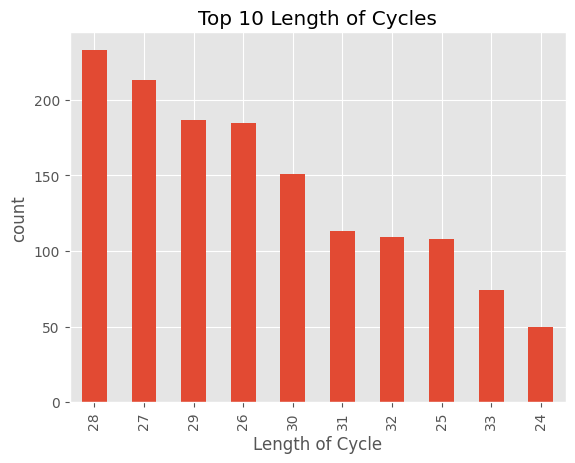

In [24]:
#Bar plot of length of cycle
ax = df['LengthofCycle'].value_counts() \
.head(10) \
.plot(kind= 'bar', title= 'Top 10 Length of Cycles')
ax.set_xlabel('Length of Cycle')
ax.set_ylabel('count')

Text(0, 0.5, 'count')

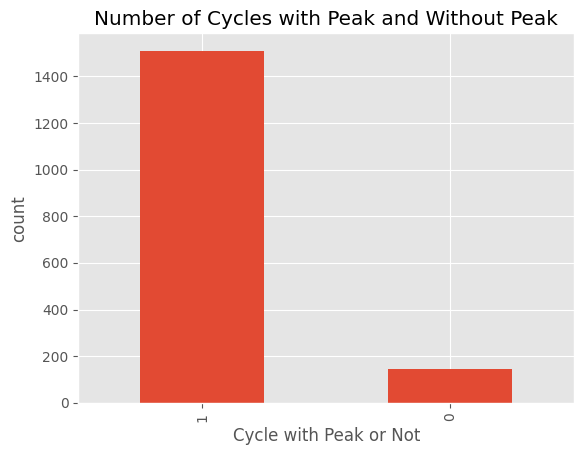

In [50]:
#Bar plot of Cycle With peak or Not
ax = df['CycleWithPeakorNot'].value_counts() \
.plot(kind= 'bar', title= 'Number of Cycles with Peak and Without Peak')
ax.set_xlabel('Cycle with Peak or Not')
ax.set_ylabel('count')

Text(0.5, 0, 'Days')

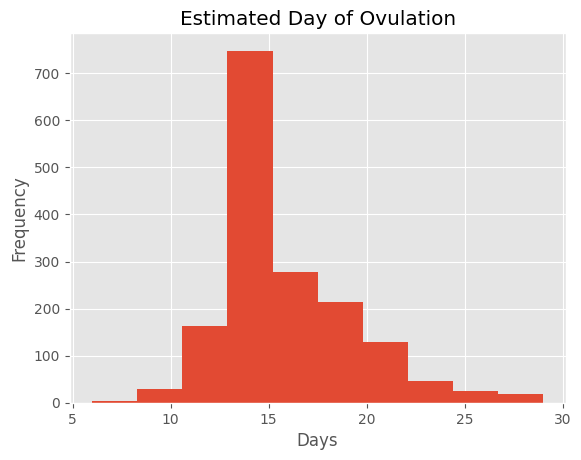

In [26]:
#Histogram for Estimated Day of Ovulation
ax = df['EstimatedDayofOvulation'].plot(kind= 'hist', 
                                        bins= 10, 
                                        title= 'Estimated Day of Ovulation' )
ax.set_xlabel('Days')

Text(0.5, 0, 'Days')

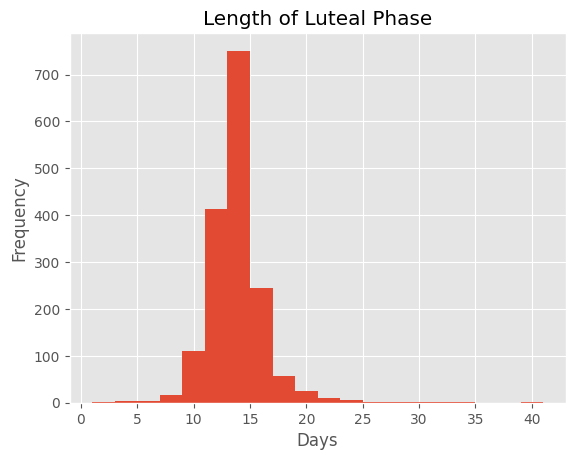

In [27]:
#Histogram for Length of Luteal Phase
ax = df['LengthofLutealPhase'].plot(kind= 'hist', 
                                        bins= 20, 
                                        title= 'Length of Luteal Phase' )
ax.set_xlabel('Days')

Text(0.5, 0, 'Count of Days')

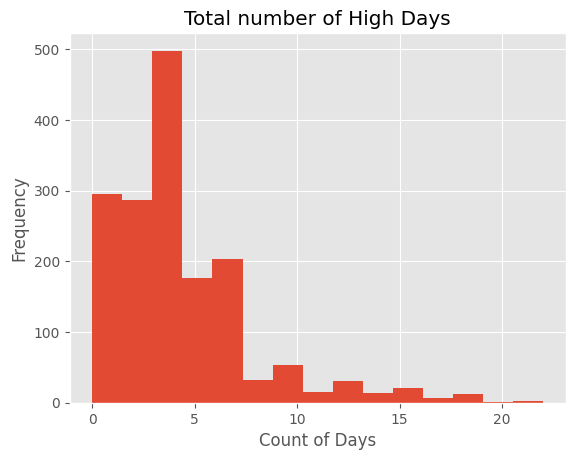

In [28]:
#Histogram for Total Number of High Days
ax = df['TotalNumberofHighDays'].plot(kind= 'hist', 
                                        bins= 15, 
                                        title= 'Total number of High Days' )
ax.set_xlabel('Count of Days')

Text(0.5, 0, 'Count of Days')

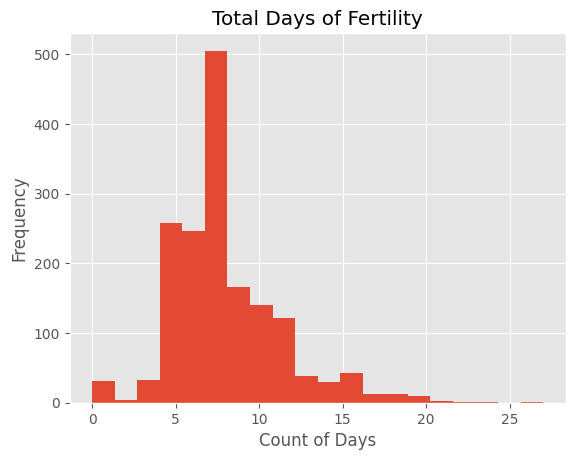

In [29]:
#Histogram for Total Days of Fertility
ax = df['TotalDaysofFertility'].plot(kind= 'hist', 
                                        bins= 20, 
                                        title= 'Total Days of Fertility' )
ax.set_xlabel('Count of Days')

Text(0, 0.5, 'count')

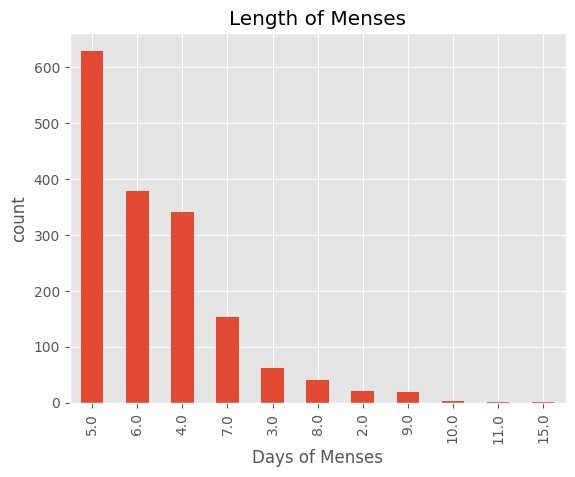

In [30]:
#Bar plot of Length of Menses
ax = df['LengthofMenses'].value_counts() \
.plot(kind= 'bar', title= 'Length of Menses')
ax.set_xlabel('Days of Menses')
ax.set_ylabel('count')

#### Feature Relationship

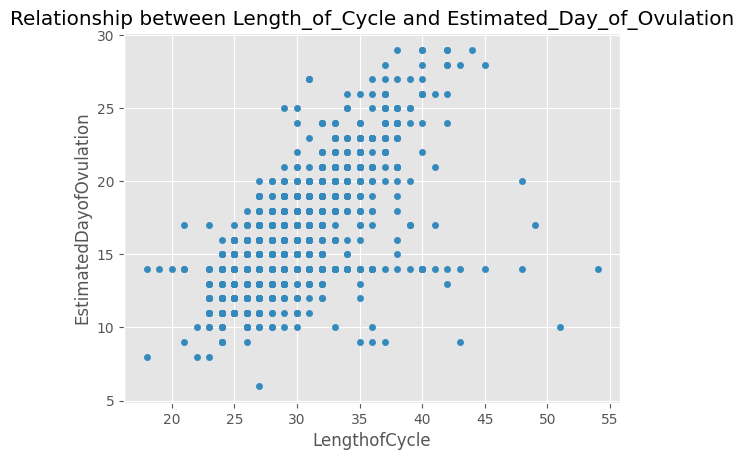

In [38]:
#Scatter Plot for 'Length of Cycle' vs 'Estimated Day of Ovulation'
df.plot(kind= 'scatter',
        x= 'LengthofCycle',
        y= 'EstimatedDayofOvulation',
        title= 'Relationship between Length_of_Cycle and Estimated_Day_of_Ovulation')
plt.show()

In [52]:
#ignore warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

<function matplotlib.pyplot.show(close=None, block=None)>

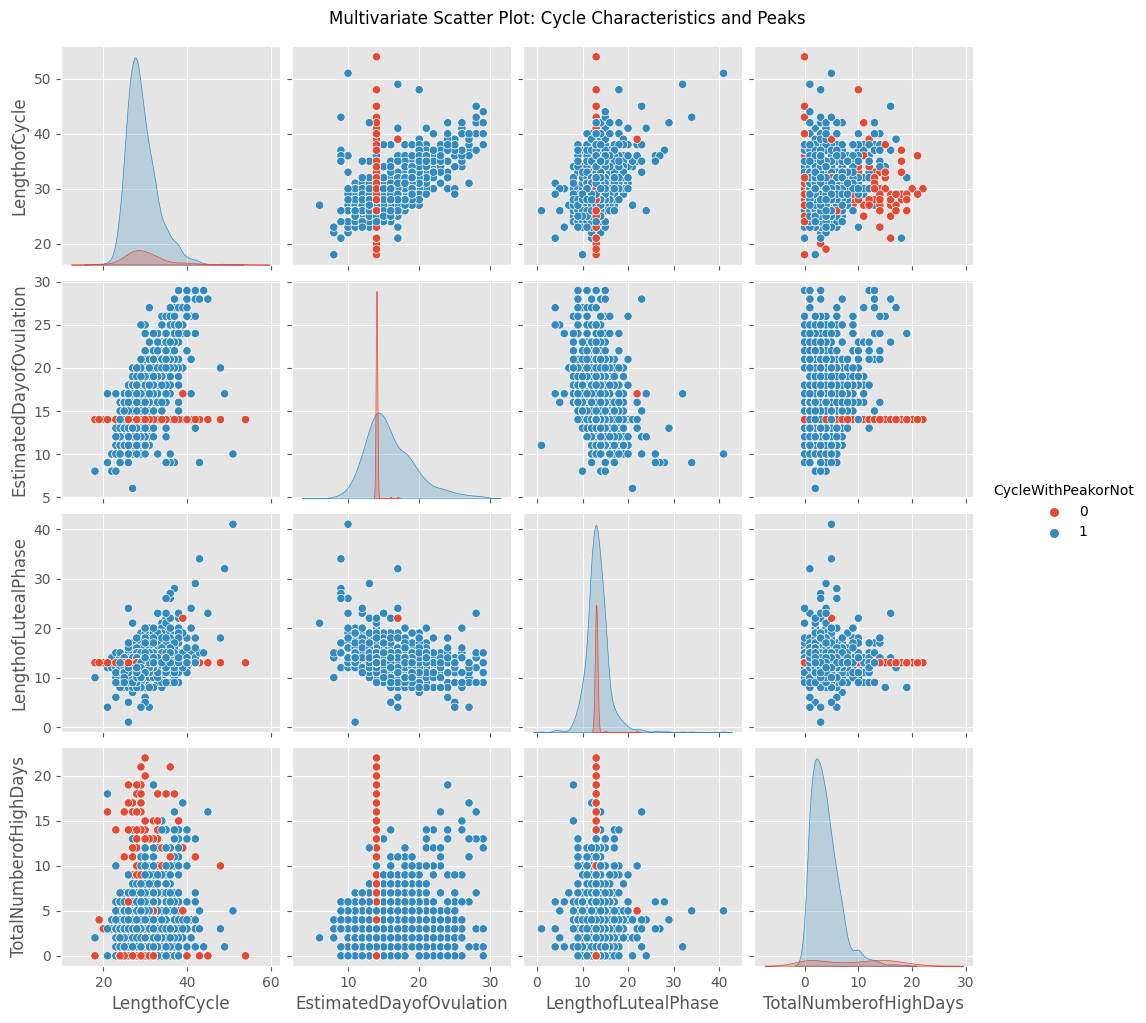

In [53]:
#Pair scatter plot of 'LengthofCycle', 'EstimatedDayofOvulation', 'LengthofLutealPhase' and 'TotalNumberofHighDays'
sns.pairplot(df, vars= ['LengthofCycle', 'EstimatedDayofOvulation',
                        'LengthofLutealPhase', 'TotalNumberofHighDays'],
                        hue= "CycleWithPeakorNot")
plt.suptitle("Multivariate Scatter Plot: Cycle Characteristics and Peaks", y=1.02)
plt.show

In [34]:
#Correlations between them
df_corr = df[['LengthofCycle', 'EstimatedDayofOvulation',
                'LengthofLutealPhase', 'TotalNumberofHighDays']].corr()
df_corr

,LengthofCycle,EstimatedDayofOvulation,LengthofLutealPhase,TotalNumberofHighDays
LengthofCycle,1.000000,0.658683,0.376116,0.151754
EstimatedDayofOvulation,0.658683,1.000000,-0.276378,0.118081
LengthofLutealPhase,0.376116,-0.276378,1.000000,-0.031562
TotalNumberofHighDays,0.151754,0.118081,-0.031562,1.000000


## Step 5: Conclusion

### Insights Derived

##### In this section, we present key insights derived from the analysis of menstrual cycle data. We explored the columns including 'Cycle Number', 'Cycle with Peak or Not', 'Length of Cycle', 'Estimated Day of Ovulation', 'Length of Luteal Phase,' 'Total Number of High Days,' 'Today Days of Fertility,' and 'Length of Menses.' Our analysis included feature plotting, distribution analysis, and relationship exploration.
##### The Processed dataset shows that there are 159 unique clientID with 1652 rows and 9 columns.


#### Length of Cycle 
- The distribution of cycle numbers shows that we have data spanning multiple Length of cycles, with 28 days been the highest length of cycle with over 220 entry counts, followed by 27 and 29 days.

#### Cycle with Peak or Not
- The 'Cycle with Peak or Not' column is boolean data type, indicating whether a cycle had a peak (1) or not (0).
- We observed a distribution of 1509 cycles with peak and 143 cycles without peak

#### Estimated Day of Ovulation
- The distribution of estimated ovulation days appeared to follow a pattern.
- Ovulation estimates were concentrated around 13-15Days range within the menstrual cycle.

#### Length of Luteal Phase
- The distribution of luteal phase lengths displayed a characteristic shape.
- Luteal phase durations typically clustered within 12-14Days range, with 13Days at peak having 486count from the total observation.

#### Total Number of High Days: This column represent the total count of days in the menstrual cycle that are considered "high"
- The distribution of the total number of high days in a cycle showed variation.
- Some cycles had more high days than others, indicating potential variability in hormone levels. The distribution shows that there were more "highs" in Days 2 to Day 6.

#### Today Days of Fertility
- The distribution of days considered fertile exhibited a pattern.
- Fertile days tended to concentrate more on 7 Days, indicating that most observations had 7 days of fertility.

#### Length of Menses
- The Bar plot of Length of Menses shows 5 days at the peak, indicating the most observations had 5days of Length of Menses.

#### Relationship Exploration

- Scatter plots and correlation analysis revealed relationships between the features: 'LengthofCycle', 'EstimatedDayofOvulation','LengthofLutealPhase', and 'TotalNumberofHighDays'.
- There is a correlation of 0.66 between 'length of Cycle' and 'Estimated Day of Ovulation'.

#### These insights provide a foundational understanding of the menstrual cycle data, enabling further analysis and modeling for menstrual cycle prediction or related research objectives.